- 데이터 출처
http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101

In [8]:
price_path = '주식가격.csv'
fundamental_path = 'PERPBR배당수익률.csv'
changes_path = '2022등락률.csv'

In [9]:
import pandas as pd

stock_price = pd.read_csv(price_path, encoding='cp949', usecols = [0,2,10,12,13])
stock_fundamental = pd.read_csv(fundamental_path, encoding='cp949', usecols = [0,2,5,6,10])
stock_changes = pd.read_csv(changes_path, encoding='cp949', usecols = [0,5])

In [10]:
stock_price.head(1)

,종목코드,시장구분,거래량,시가총액,상장주식수
0,060310,KOSDAQ,300234,107508662030,48536642


In [11]:
stock_fundamental.head(1)

,종목코드,종가,EPS,PER,PBR
0,060310,2215,33.0,67.12,2.67


In [12]:
stock_changes.head(1)

,종목코드,등락률
0,060310,-24.79


In [17]:
# 내코드

df1 = stock_price.merge(stock_fundamental)
stock_df = df1.merge(stock_changes)
stock_df.head()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률
0,060310,KOSDAQ,300234,107508662030,48536642,2215,33.0,67.12,2.67,-24.79
1,095570,KOSPI,2347918,248626386450,46822295,5310,1707.0,3.11,0.66,4.02
2,006840,KOSPI,13651,235806585800,13247561,17800,NaN,NaN,0.39,-11.00
3,054620,KOSDAQ,44878,270019486040,20394221,13240,1179.0,11.23,1.31,17.69
4,265520,KOSDAQ,71498,310976917350,15281421,20350,3932.0,5.18,1.60,-7.69


In [19]:
df1 = pd.merge(stock_price, stock_fundamental, on='종목코드')
stock = pd.merge(df1, stock_changes, on='종목코드')
stock.head()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률
0,060310,KOSDAQ,300234,107508662030,48536642,2215,33.0,67.12,2.67,-24.79
1,095570,KOSPI,2347918,248626386450,46822295,5310,1707.0,3.11,0.66,4.02
2,006840,KOSPI,13651,235806585800,13247561,17800,NaN,NaN,0.39,-11.00
3,054620,KOSDAQ,44878,270019486040,20394221,13240,1179.0,11.23,1.31,17.69
4,265520,KOSDAQ,71498,310976917350,15281421,20350,3932.0,5.18,1.60,-7.69


In [ ]:
# 시각화해서 통계량을 확인해야 함!
# PER, PBR 분포 확인하고 통계량 확인 해서 그림이 어떻게 그려지는지보기

In [ ]:
# PER가 높다 > 주당순이익 대비 주가가 높다 > '고평가' 받고 있다 or 사람들이 미래가치를 인정한다 (성장주를 보겠다고 하면 1. 이상인거 / 싼거 사고 싶으면 1.이하..) ( per가 높다고 해서 안좋은거 아님!)
# PBR이 높다 > 가진거 없이 비싸게 취급 받는다(가진거 대비 비싸다)

# 기업 가치 대비 가격이 저렴한 기업!! 을 사자!

In [22]:
stock[['PBR', 'PER']].describe() # median이 12, 평균이 35 >> 오른쪽에 치우쳐져 있다. 높은쪽에 치우쳐져 있다.. 이상치.. 높은게 많겠구나 // max가 6900이상?! 이상치

,PBR,PER
count,2234.000000,1569.000000
mean,1.905421,35.565800
std,2.492298,204.176518
min,0.140000,0.310000
25%,0.660000,6.620000
50%,1.170000,12.110000
75%,2.130000,23.930000
max,35.870000,6910.000000


<AxesSubplot: ylabel='Frequency'>

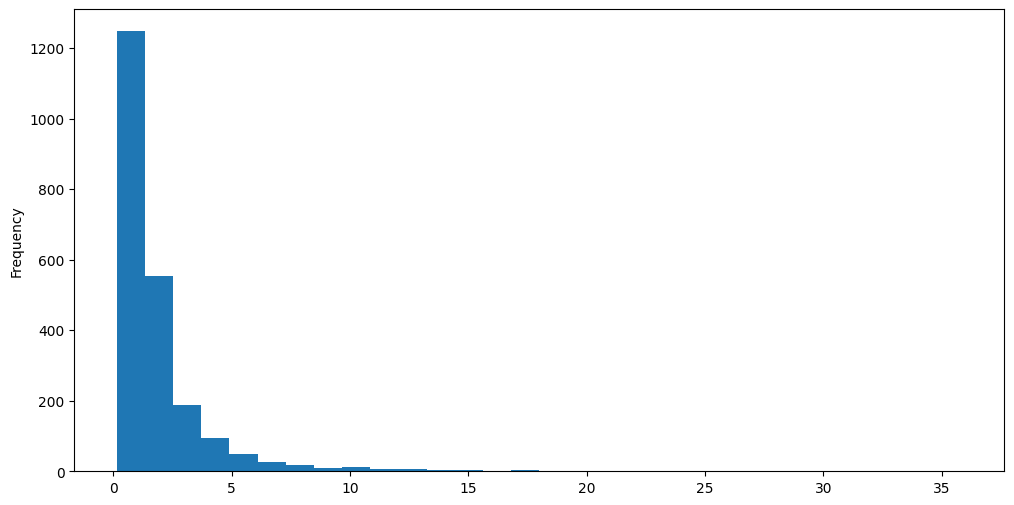

In [23]:
# 히스토그램으로 
stock['PBR'].plot.hist(figsize = (12,6), bins = 30)

<AxesSubplot: ylabel='Frequency'>

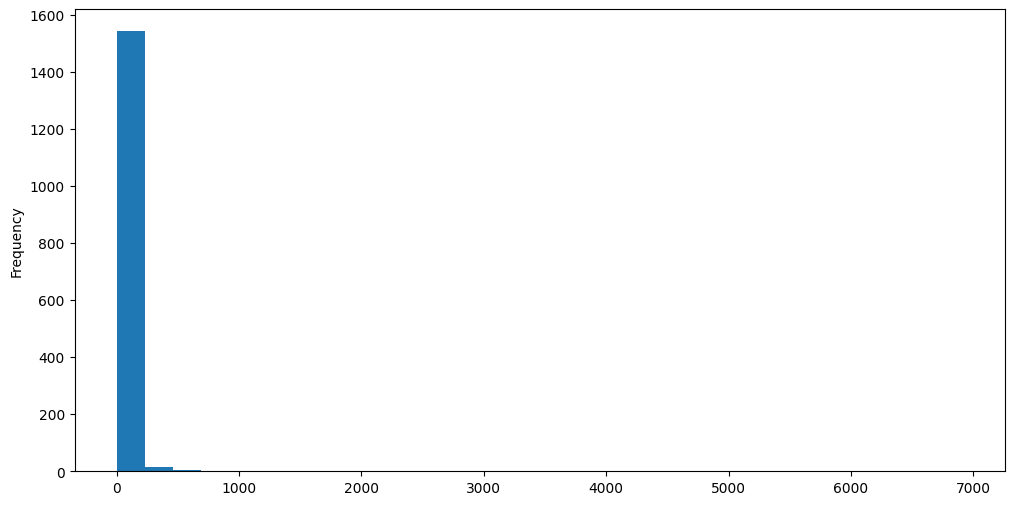

In [24]:
stock['PER'].plot.hist(figsize = (12,6), bins = 30) # 이상치가 있을것 같다.. 이럴경우는 바이올린 plot이나 box plot그려서 확인하면 좋을듯.

In [26]:
stock = stock[(stock['거래량'] > 0) & (stock['EPS'] > 0)] # 흑자를 기록한 기업 (&거래량이 있는 기업)
stock['PBR_rank'] = stock['PBR'].rank()
stock['PER_rank'] = stock['PER'].rank()
stock.head()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률,PBR_rank,PER_rank
0,060310,KOSDAQ,300234,107508662030,48536642,2215,33.0,67.12,2.67,-24.79,1362.0,1446.0
1,095570,KOSPI,2347918,248626386450,46822295,5310,1707.0,3.11,0.66,4.02,449.5,116.5
3,054620,KOSDAQ,44878,270019486040,20394221,13240,1179.0,11.23,1.31,17.69,955.5,733.0
4,265520,KOSDAQ,71498,310976917350,15281421,20350,3932.0,5.18,1.60,-7.69,1086.5,278.5
5,211270,KOSDAQ,700505,262582912640,15082304,17410,99.0,175.86,3.05,36.64,1406.5,1525.0


In [27]:
stock.sort_values('PBR_rank') # PBR 낮음.. 싼데 왜이렇게 등락률이 낮을까?.. 어떤 문제가 있거나 미래가치가 없을 수도 있다! 최소 PBR은 몇 정도가 좋을지 정해야겠다!

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률,PBR_rank,PER_rank
70,012630,KOSPI,24949,354865822740,59741721,5940,2069.0,2.87,0.14,-20.56,1.0,93.0
2248,004960,KOSPI,62773,105061974160,11570702,9080,4187.0,2.17,0.16,-44.23,2.5,42.0
1986,003240,KOSPI,387,822802600000,1113400,739000,377488.0,1.96,0.16,-31.39,2.5,31.0
2280,088350,KOSPI,1325859,2184352950000,868530000,2515,1455.0,1.73,0.17,-21.13,4.0,26.0
44,375500,KOSPI,133602,1350407442700,38693623,34900,26903.0,1.30,0.18,-38.87,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,383310,KOSDAQ,121779,823405341600,15304932,53800,751.0,71.64,13.12,10.03,1559.0,1458.0
348,121600,KOSDAQ,1459685,1350617458500,10848333,124500,703.0,177.10,13.36,116.96,1560.0,1526.0
1743,287410,KOSDAQ,542142,648825195200,71299472,9100,195.0,46.67,13.75,15.54,1561.0,1378.0
291,035290,KOSDAQ,59187,344663184880,46450564,7420,21.0,353.33,17.71,91.83,1562.0,1546.0


In [31]:
low_pbr_list = stock[stock['PBR'] > 0.66].sort_values('PBR_rank').head(30)['종목코드'].values
low_pbr_list

array(['087600', '031440', '081150', '001460', '025560', '003010',
       '001120', '068400', '248170', '298040', '005360', '052900',
       '119850', '004270', '014530', '001540', '046940', '039830',
       '039310', '001560', '031980', '058860', '039490', '006730',
       '138070', '020400', '093190', '035620', '198440', '021650'],
      dtype=object)

In [35]:
low_pbr_df = stock[stock['종목코드'].isin(low_pbr_list)]
low_pbr_df['등락률'].mean()

-7.402

In [36]:
len(stock)

1563

In [38]:
# 전체에서 30개씩 랜덤하게 뽑아 계산
shuffle_stocks = stock.sample(frac=1) # frac=1하면 랜덤으로 데이터가 섞임
shuffle_stocks.head()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률,PBR_rank,PER_rank
1500,103840,KOSDAQ,156458,43700770000,14258000,3065,92.0,33.32,1.05,-47.13,780.5,1298.0
1303,098660,KOSDAQ,2008730,33752635200,12500976,2700,28.0,96.43,1.12,7.21,831.0,1483.0
481,007680,KOSDAQ,10016,95873359620,13446474,7130,2385.0,2.99,0.29,-22.14,59.0,103.0
2197,053300,KOSDAQ,153922,254000092480,41776331,6080,371.0,16.39,1.45,-2.53,1022.0,997.0
1633,015020,KOSPI,70593,38694994800,42851600,903,38.0,23.76,0.70,-57.98,490.5,1167.0


In [41]:
shuffle_stocks['group'] = pd.cut(shuffle_stocks.index, bins = 51, labels = False)
shuffle_stocks.head()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률,PBR_rank,PER_rank,group
1500,103840,KOSDAQ,156458,43700770000,14258000,3065,92.0,33.32,1.05,-47.13,780.5,1298.0,31
1303,098660,KOSDAQ,2008730,33752635200,12500976,2700,28.0,96.43,1.12,7.21,831.0,1483.0,27
481,007680,KOSDAQ,10016,95873359620,13446474,7130,2385.0,2.99,0.29,-22.14,59.0,103.0,10
2197,053300,KOSDAQ,153922,254000092480,41776331,6080,371.0,16.39,1.45,-2.53,1022.0,997.0,46
1633,015020,KOSPI,70593,38694994800,42851600,903,38.0,23.76,0.70,-57.98,490.5,1167.0,34


In [42]:
shuffle_stocks.groupby('group').count()

,종목코드,시장구분,거래량,시가총액,상장주식수,종가,EPS,PER,PBR,등락률,PBR_rank,PER_rank
group,,,,,,,,,,,,
0,30,30,30,30,30,30,30,30,30,30,30,30
1,30,30,30,30,30,30,30,30,30,30,30,30
2,32,32,32,32,32,32,32,32,32,32,32,32
3,34,34,34,34,34,34,34,34,34,34,34,34
4,36,36,36,36,36,36,36,36,36,36,36,36
5,33,33,33,33,33,33,33,33,33,33,33,33
6,30,30,30,30,30,30,30,30,30,30,30,30
7,26,26,26,26,26,26,26,26,26,26,26,26
8,28,28,28,28,28,28,28,28,28,28,28,28


In [44]:
grouped_stocks = shuffle_stocks.groupby('group').mean()[['등락률']]
print(grouped_stocks['등락률'].max(), grouped_stocks['등락률'].min(), grouped_stocks['등락률'].mean()) # 최대수익률, 최저수익률, 평균

20.60222222222222 -19.25030303030303 -7.702311129596413


C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\523837510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_stocks = shuffle_stocks.groupby('group').mean()[['등락률']]


In [ ]:
# 여기에다가 per까지.. 넣어면 더 좋은 전략 나올거임..